
# **Recommendation System: Automating Book's Suggestion using Collaborative Filtering**

By    : Muhammad Fatih Idlan (faiti.alfaqar@gmail.com)



## Project Overview
In today’s digital age, the volume of content and choices available to users across platforms is overwhelming. Recommender systems play an indispensable role in navigating this vast landscape, ensuring users discover relevant and engaging content without being inundated by irrelevant options. By personalizing user experiences, these systems have become a cornerstone in industries like e-commerce, entertainment, and education, boosting user satisfaction, retention, and revenue. This project delves into the development of a book recommendation system, leveraging collaborative filtering techniques and the Nearest Neighbors algorithm to match users with books they are most likely to enjoy. Collaborative filtering, a widely used approach, relies on user-item interactions to uncover patterns and provide recommendations. Furthermore, Collaborative Filtering can make unforeseen recommendations, which means it might offer items that are relevant to the user even if the information is not in the user's profile [[ 1 ]](https://doi.org/10.1016/j.eij.2015.06.005). The system implementation is aimed to demonstrate how machine learning can be harnessed to create a seamless and personalized user experience in the context of literature discovery.

## Business Understanding
### Problem Statement
Starting with explanation from the background above, core problems that this project aims to solve are:

* How to develop a machine learning-based recommendation system for books?
* How are the results when data with and without standardization is compared using the same algorithm?

### Objectives
According to problem statement above, this project has several objectives too, that are:

* Develop a machine learning-based recommendation system for books
* Determining high performance model with variation of data preparation method

### Solution Approach
To achive the objectives, we need to perform several things such as:

* Using Nearest Neighbour through variation of data with and without standardization to selecting high performance corresponding to evaluation metrics (Euclidean Distance)

## Import Package dan Libraries

In [59]:
import kagglehub
import kagglehub
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

## Data Loading

In [60]:
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3


In [61]:
files = os.listdir(path)

print("Files in dataset:", files)

Files in dataset: ['Books.csv', 'classicRec.png', 'Ratings.csv', 'Users.csv', 'DeepRec.png', 'recsys_taxonomy2.png']


In [62]:
path2book = f'{path}/Books.csv'
book = pd.read_csv(path2book)
book.head()

<ipython-input-62-9de83a5eeed5>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv(path2book)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [63]:
path2rating = f'{path}/Ratings.csv'
rating = pd.read_csv(path2rating)
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [64]:
book = book.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'Year-Of-Publication', 'Publisher'], axis=1)

In [65]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   Book-Title   271360 non-null  object
 2   Book-Author  271358 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


In [66]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## Data Cleaning

In [67]:
book.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2


In [68]:
book = book.dropna()

book.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0


In [69]:
rating.isna().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [70]:
print(f'Duplicated data: {book.duplicated().sum()}')

Duplicated data: 0


In [71]:
print(f'Duplicated data: {rating.duplicated().sum()}')

Duplicated data: 0


## Data Understanding

The dataset that used in this project is Book Recommendation Dataset, which can be accessed through kaggle [[ 2 ]](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data). This dataset consist of 3 csv files, Books.csv (271360 rows with 8 columns), Ratings.csv (1149780 rows with 3 columns), and Users.csv (27885 rows with 3 columns), also has 3 png file which irrelevant in this project. The explanation for each column can be seen below:

For Books.csv, the column are consist of:

* ISBN = International Standard Book Number of the books inside obtained from Amazon Web Services
* Book-Title = Title of the books obtained from Amazon Web Services
* Book-Author = The Author of the books obtained from Amazon Web Services
* Year-Of-Publication = Publication year of the books obtained from Amazon Web Services
* Publisher = The Publisher of the books obtained from Amazon Web Services
* Image-URL-S = URL for small sized Book's cover images point to the Amazon web site
* Image-URL-M = URL for medium sized Book's cover images point to the Amazon web site
* Image-URL-L = URL for large sized Book's cover images point to the Amazon web site

For Ratings.csv, the column are consist of:

* User-ID = Anonymized user identification in integers
* ISBN = International Standard Book Number of the books inside obtained from Amazon Web Services
* Book-Rating = Rating of the books, expressed on a scale from 1-10 (higher values denoting higher appreciation) in an explicit way, or expressed by 0 in implicit way

For Users.csv, the column are consist of:

* User-ID = Anonymized user identification in integers
* Location = Region of the reader in form of city, country
* Age = Age of the readers

In [72]:
title = book['Book-Title'].value_counts()

print(f'Amount of unique book titles: {len(title)}')

Amount of unique book titles: 242133


In [73]:
isbn = book['ISBN'].value_counts()

print(f'Amount of unique ISBN: {len(isbn)}')

Amount of unique ISBN: 271358


In [74]:
author = book['Book-Author'].value_counts()

print(f'Amount of unique author: {len(author)}')

Amount of unique author: 102022


In [75]:
user = rating['User-ID'].value_counts()

print(f'Amount of unique userID: {len(user)}')

Amount of unique userID: 105283


### Exploratory Data Analysis

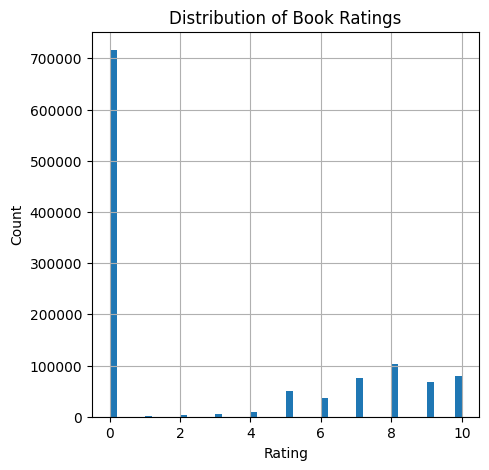

In [76]:
rating['Book-Rating'].hist(figsize=(5,5), bins=50)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [77]:
rating = rating[rating['Book-Rating'] != 0]

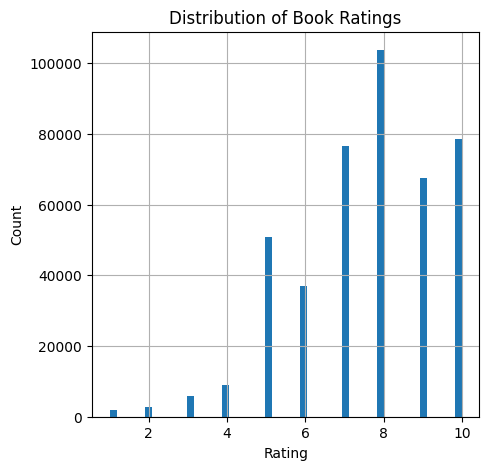

In [78]:
rating['Book-Rating'].hist(figsize=(5,5), bins=50)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

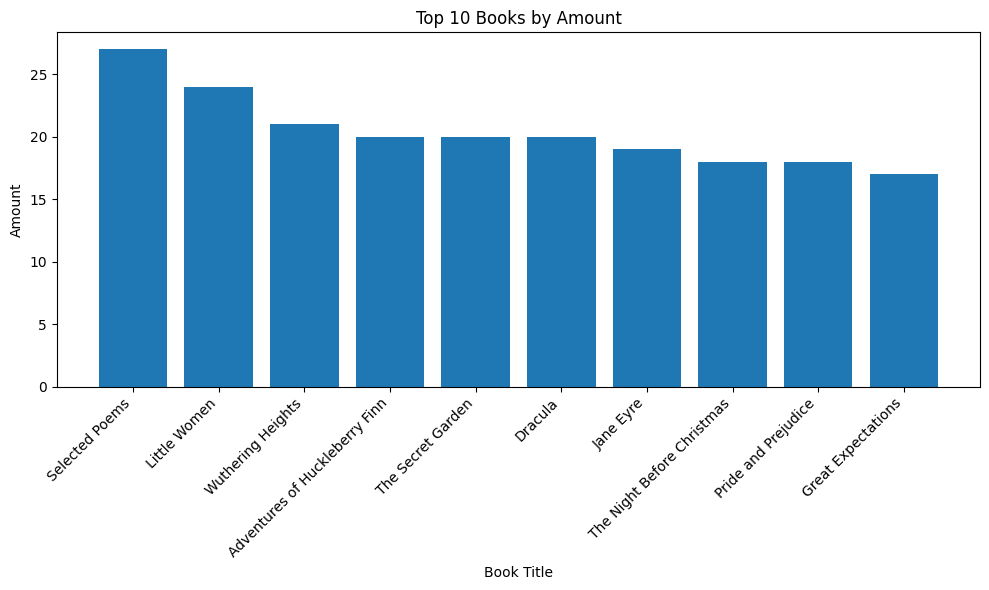

In [79]:
title_counts = book['Book-Title'].value_counts()

top_10_books = title_counts.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_books.index, top_10_books.values)
plt.xlabel("Book Title")
plt.ylabel("Amount")
plt.title("Top 10 Books by Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Top 10 Users with the Most Rating Amount'}, xlabel='User-ID'>

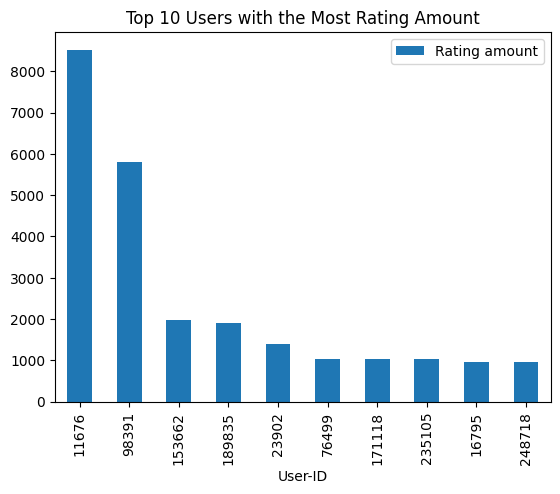

In [80]:
ratings = rating['User-ID'].value_counts()

ratings.sort_values(ascending=False).to_frame(name='Rating amount').head(10).plot(kind='bar',title='Top 10 Users with the Most Rating Amount')

In [81]:
top_10_books

,count
Book-Title,
Selected Poems,27
Little Women,24
Wuthering Heights,21
Adventures of Huckleberry Finn,20
The Secret Garden,20
Dracula,20
Jane Eyre,19
The Night Before Christmas,18
Pride and Prejudice,18


In [82]:
rating.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [83]:
book.head()

,ISBN,Book-Title,Book-Author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


## Pre-Processing

In [84]:
len(ratings[ratings < 200])

77660

In [85]:
rating['User-ID'].isin(ratings[ratings < 200].index).sum()

364245

In [86]:
df_rating = rating[
  ~rating['User-ID'].isin(ratings[ratings < 200].index)
]
df_rating.shape

(69426, 3)

In [87]:
ratings = rating['ISBN'].value_counts()
ratings.sort_values(ascending=False).head()

,count
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333


In [88]:
len(ratings[ratings < 100])

185833

In [89]:
book['ISBN'].isin(ratings[ratings < 100].index).sum()

149695

In [90]:
df_rating = df_rating[
  ~df_rating['ISBN'].isin(ratings[ratings < 100].index)
]
df_rating.shape

(1275, 3)

In [91]:
books = ["Where the Heart Is (Oprah's Book Club (Paperback))",
        "I'll Be Seeing You",
        "The Weight of Water",
        "The Surgeon",
        "I Know This Much Is True"]

for i in books:
    print(df_rating['ISBN'].isin(book[book['Book-Title'] == i]['ISBN']).sum())

6
0
0
0
0


In [92]:
df_main = df_rating.pivot_table(index=['User-ID'],columns=['ISBN'],values='Book-Rating').fillna(0).T
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 14929 to 1138811
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      1275 non-null   int64 
 1   ISBN         1275 non-null   object
 2   Book-Rating  1275 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 39.8+ KB


In [93]:
df_main.index = df_main.join(book.set_index('ISBN'))['Book-Title']

In [94]:
df_main

User-ID,2276,4385,6242,6251,6575,7346,11676,13552,16634,16795,...,257204,258185,261829,262998,264321,265115,265889,269566,270713,274061
Book-Title,,,,,,,,,,,,,,,,,,,,,
Stupid White Men ...and Other Sorry Excuses for the State of the Nation!,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Divine Secrets of the Ya-Ya Sisterhood: A Novel,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Bean Trees,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Divine Secrets of the Ya-Ya Sisterhood: A Novel,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Poisonwood Bible: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1),0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wild Animus,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The No. 1 Ladies' Detective Agency (Today Show Book Club #8),0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0


In [95]:
df_main.loc["The Divine Secrets of the Ya-Ya Sisterhood: A Novel"][:5]

,The Divine Secrets of the Ya-Ya Sisterhood: A Novel
User-ID,
2276,0.0
4385,0.0
6242,0.0
6251,0.0
6575,8.0


##Model Development

In [96]:
KNN = NearestNeighbors(metric='euclidean')
KNN.fit(df_main.values)

NearestNeighbors(metric='euclidean')

In [97]:
df_main.iloc[0].shape

(131,)

In [98]:
title = 'The Bean Trees'
df_main.loc[title].shape

(131,)

In [99]:
distance_KNN, indice_KNN = KNN.kneighbors([df_main.loc[title].values], n_neighbors=10)

print(distance_KNN)
print(indice_KNN)

[[ 0.         20.71231518 20.97617696 21.54065923 22.56102835 22.58317958
  22.69361144 23.21637353 23.23790008 23.85372088]]
[[  2 114  56  49   7  97 115  53  40  45]]


In [100]:
df_main.iloc[indice_KNN[0]].index.values

array(['The Bean Trees',
       "She's Come Undone (Oprah's Book Club (Paperback))",
       "The Book of Ruth (Oprah's Book Club (Paperback))",
       'A Heartbreaking Work of Staggering Genius',
       'Prodigal Summer: A Novel', 'Message in a Bottle',
       "She's Come Undone (Oprah's Book Club)", 'Mystic River',
       'The Queen of the Damned (Vampire Chronicles (Paperback))',
       'While I Was Gone'], dtype=object)

In [101]:
standarize_data = StandardScaler().fit_transform(df_main.values)

BT = NearestNeighbors(metric='euclidean')
BT.fit(standarize_data)

NearestNeighbors(metric='euclidean')

In [102]:
distance_BT, indice_BT = BT.kneighbors([df_main.loc[title].values], n_neighbors=10)

print(distance_BT)
print(indice_BT)

[[13.21087432 18.25312417 19.17555189 20.0046431  20.12732714 20.30873396
  20.33083905 20.33641303 20.42423929 20.60415091]]
[[  2 114  97  56 102 118   7  24  49 105]]


In [103]:
df_main.iloc[indice_BT[0]].index.values

array(['The Bean Trees',
       "She's Come Undone (Oprah's Book Club (Paperback))",
       'Message in a Bottle',
       "The Book of Ruth (Oprah's Book Club (Paperback))",
       "Where the Heart Is (Oprah's Book Club (Paperback))",
       'Midnight in the Garden of Good and Evil: A Savannah Story',
       'Prodigal Summer: A Novel', 'The Hours: A Novel',
       'A Heartbreaking Work of Staggering Genius', '1984'], dtype=object)

## Model Evaluation

In [104]:
df_eval = pd.DataFrame({
    'Recommended Title w/ Standardization'   : df_main.iloc[indice_BT[0]].index.values,
    'Recommended Distance w/ Standardization': distance_BT[0],
    'Recommended Title w/o Standardization'   : df_main.iloc[indice_KNN[0]].index.values,
    'Recommended Distance w/o Standardization': distance_KNN[0],
    }) \
    .sort_values(by='Recommended Distance w/ Standardization', ascending=True)

df_eval

,Recommended Title w/ Standardization,Recommended Distance w/ Standardization,Recommended Title w/o Standardization,Recommended Distance w/o Standardization
0,The Bean Trees,13.210874,The Bean Trees,0.000000
1,She's Come Undone (Oprah's Book Club (Paperback)),18.253124,She's Come Undone (Oprah's Book Club (Paperback)),20.712315
2,Message in a Bottle,19.175552,The Book of Ruth (Oprah's Book Club (Paperback)),20.976177
3,The Book of Ruth (Oprah's Book Club (Paperback)),20.004643,A Heartbreaking Work of Staggering Genius,21.540659
4,Where the Heart Is (Oprah's Book Club (Paperba...,20.127327,Prodigal Summer: A Novel,22.561028
5,Midnight in the Garden of Good and Evil: A Sav...,20.308734,Message in a Bottle,22.583180
6,Prodigal Summer: A Novel,20.330839,She's Come Undone (Oprah's Book Club),22.693611
7,The Hours: A Novel,20.336413,Mystic River,23.216374
8,A Heartbreaking Work of Staggering Genius,20.424239,The Queen of the Damned (Vampire Chronicles (P...,23.237900
9,1984,20.604151,While I Was Gone,23.853721


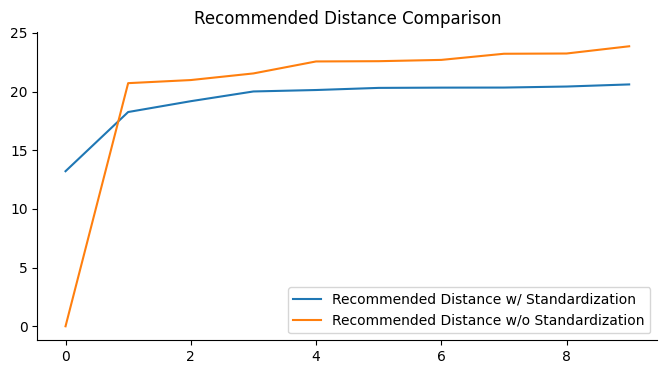

In [105]:
df_eval[['Recommended Distance w/ Standardization','Recommended Distance w/o Standardization']].plot(kind='line', figsize=(8, 4), title='Recommended Distance Comparison')
plt.gca().spines[['top', 'right']].set_visible(False)

## Top-N Recommendation Function

In [106]:
def get_recommends(title="", n=5):
    try:
        book_index = df_main.index.get_loc(title)  # Get index directly
        book_values = df_main.values[book_index]  # Get values using index
    except KeyError as e:
        print('The given book', e, 'does not exist')
        return

    n+=1

    distances, indices = KNN.kneighbors([book_values], n_neighbors=n)

    # Get recommended titles directly using indices
    recommended_titles = df_main.iloc[indices[0]].index.tolist()

    recommended_titles = [x for x in recommended_titles if x != title]

    recommended_titles_str = '\n'.join(recommended_titles)

    return f"This are your top {n-1} recommended books:\n{recommended_titles_str}"

In [107]:
books = get_recommends("Into the Wild",5)
print(books)

This are your top 5 recommended books:
The Book of Ruth (Oprah's Book Club (Paperback))
A Heartbreaking Work of Staggering Genius
Wild Animus
She's Come Undone (Oprah's Book Club)
Angels &amp; Demons
